In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [2]:
df = pd.read_excel('CT_tall.xlsx', header=[1])
df=df[df['Bildetype'] == 'CT']
#df=df[df['EXAMTYPE'].str.contains("interv")]

CT    12181
Name: Bildetype, dtype: int64


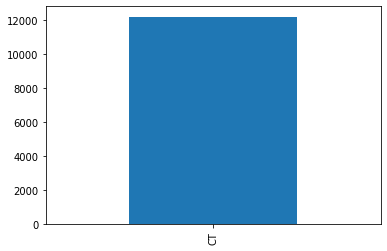

In [3]:
print(df['Bildetype'].value_counts())
df['Bildetype'].value_counts().plot(kind='bar')

(91203) 705921 Seksjon for onkologisk radiologi    12178
(91202) 705922 Seksjon for brystdiagnostikk            3
Name: Håndtert_av_seksjon, dtype: int64


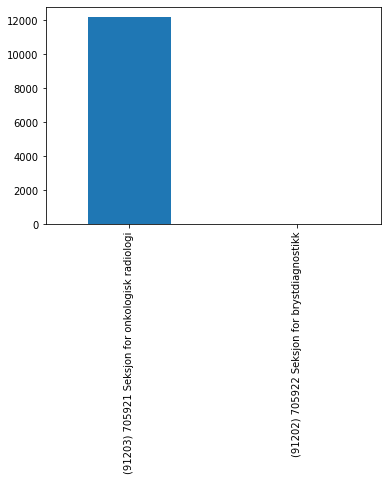

In [4]:
print(df['Håndtert_av_seksjon'].value_counts())
df['Håndtert_av_seksjon'].value_counts().plot(kind='bar')

2017    6146
2018    6035
Name: aar, dtype: int64


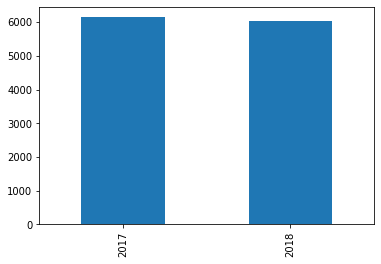

In [5]:
print(df['aar'].value_counts())
df['aar'].value_counts().plot(kind='bar')

aar   mnd
2017  1      530
      2      479
      3      599
      4      446
      5      586
      6      522
      7      350
      8      513
      9      536
      10     541
      11     587
      12     457
2018  1      566
      2      478
      3      464
      4      548
      5      442
      6      655
      7      357
      8      538
      9      502
      10     516
      11     556
      12     413
dtype: int64


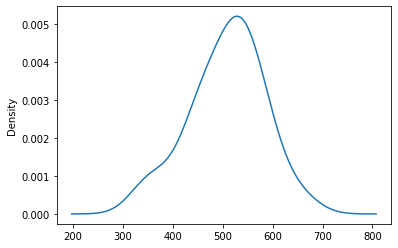

In [6]:
print(df.groupby(["aar", "mnd"]).size())
df.groupby(["aar", "mnd"]).size().plot(kind="density")
#df.groupby(["aar", "mnd"]).size().plot(kind="hist")


SSQ0AD    4633
SST0AD    2608
SSL0AD    1213
SSC0AD    1115
SSK0AD     437
ZXM20      414
SSV0AD     278
SSJ0AD     230
SSP0AD     153
SSE0AD     150
GDB16D     145
SAA0AD     124
SKX0AD      96
SNB0BD      76
SNG0AD      63
SSW0AD      52
SNF0AD      50
SSB0AD      49
SSU0AD      34
SNA0BD      25
SKX0BD      24
SSN0AD      21
SNA0AD      20
SNH0BD      20
SSY0AD      19
SBC0AD      17
SNA0GD      16
SSS0AD      13
SSH0AD      13
SSR0AD      11
SND0AD      11
SJJ0AD      10
SSM0AD       8
SNC0AD       6
SFC0FP       4
SDX0AD       4
GXO33D       4
SSR0AP       2
SNJ0AD       2
SNJ0BD       1
SNA0KD       1
SNB0AD       1
SNF0BD       1
SNC0BD       1
SSX0AD       1
SSL0AP       1
SSD0AD       1
SAF0AD       1
SFY0AD       1
SNG0BD       1
Name: NORAKO, dtype: int64


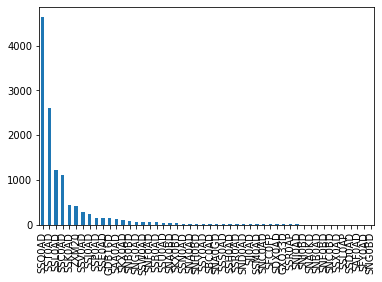

In [7]:
print(df['NORAKO'].value_counts())
df['NORAKO'].value_counts().plot(kind='bar')

NORAKO  EXAMTYPE                  
SSQ0AD  CT S Thorax/abdomen/bekken    4633
SST0AD  CT S Hals/txh/abd/bekken      2608
SSL0AD  CT S Abdomen og bekken        1146
SSC0AD  CT Thorax                     1115
SSK0AD  CT S Thorax og abdomen         430
                                      ... 
SNC0AD  CT Albue / U.arm Bilat.          1
SNC0BD  CT Albue / Underarm Dxt.         1
SNG0AD  CT Kne / Legg Bilat.             1
SNF0AD  CT Hofte / Lår Bilat.            1
SSD0AD  UL Abdomen                       1
Length: 90, dtype: int64


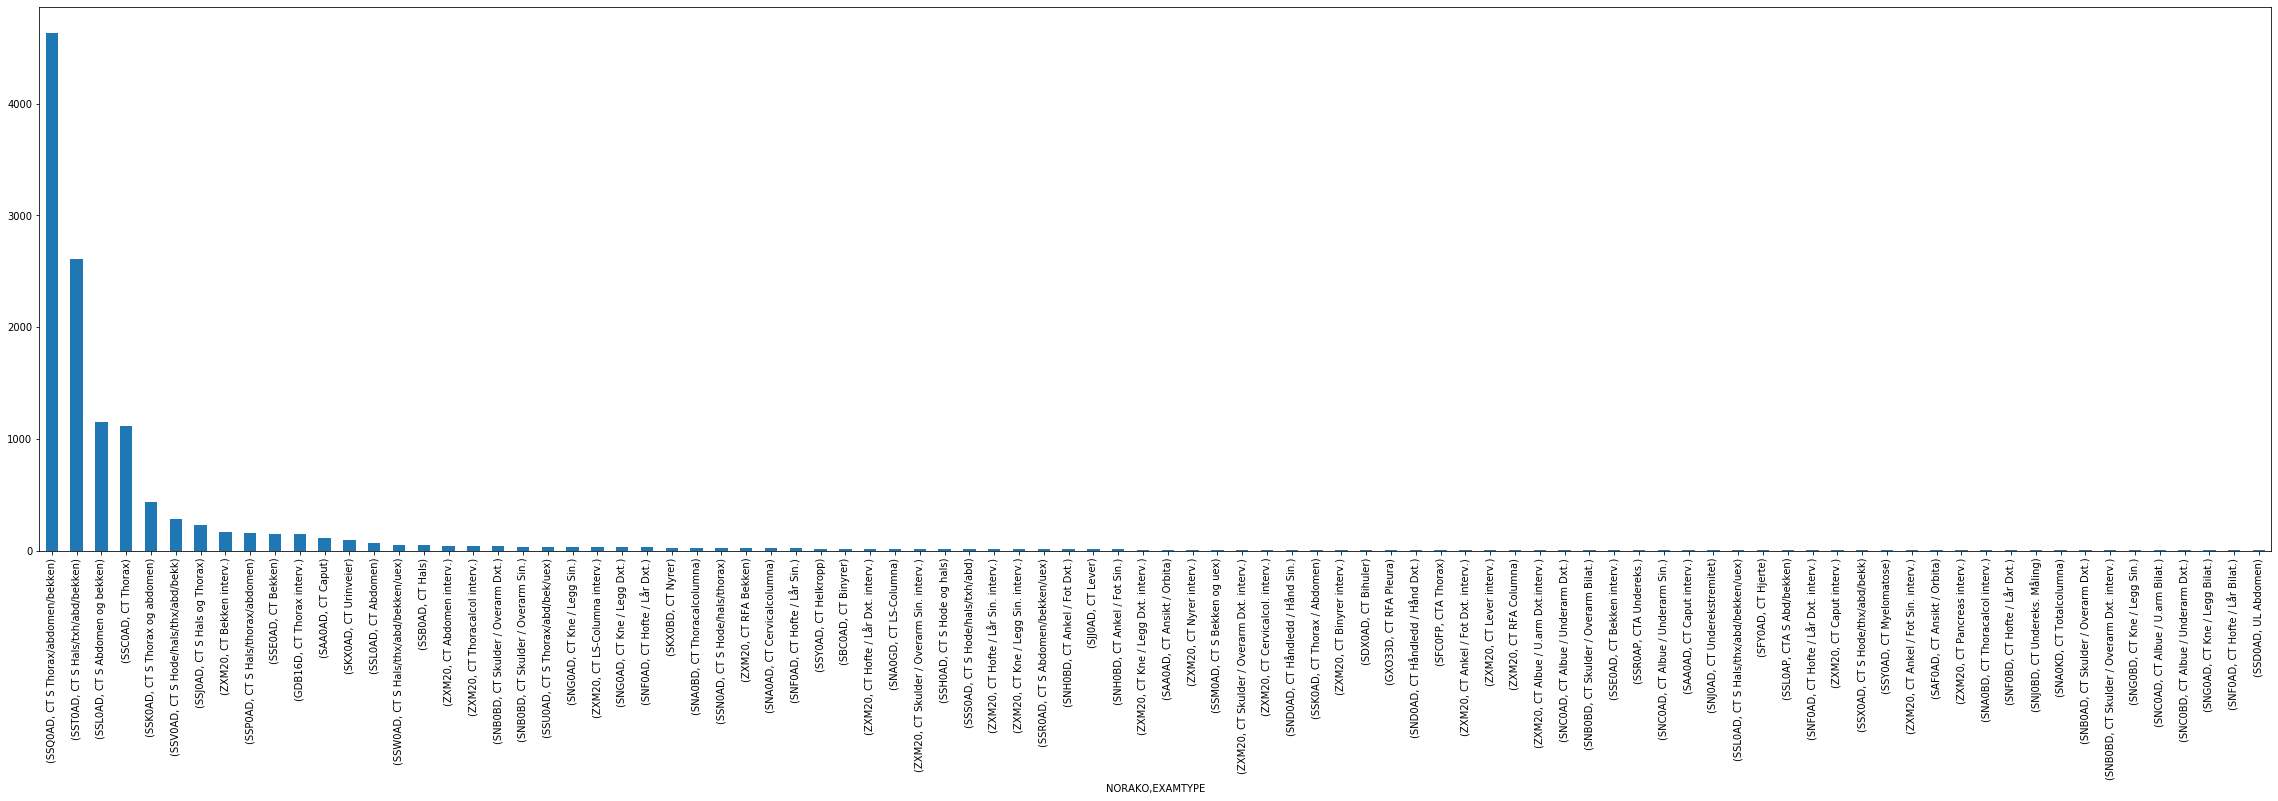

In [8]:
print(df.groupby(["NORAKO", "EXAMTYPE"]).size().sort_values(ascending=False))
df.groupby(["NORAKO", "EXAMTYPE"]).size().sort_values(ascending=False).plot(kind='bar',figsize=(40,10))

Med. 4 timer     1232
2-3 dager         855
Pakkeforløp       594
Med. 24 timer     406
Adm. 24 timer      19
Adm. 4 timer       10
Name: Hastegrad, dtype: int64


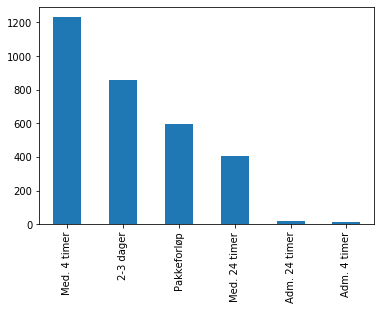

In [9]:
print(df['Hastegrad'].value_counts())
df['Hastegrad'].value_counts().plot(kind='bar')

I    9883
S    2278
T      20
Name: oppholdstype, dtype: int64


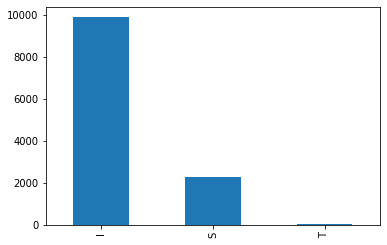

In [10]:
print(df['oppholdstype'].value_counts())
df['oppholdstype'].value_counts().plot(kind='bar')

Sarkom-M2         24.086538
Gyn               18.317308
Lymfom-M4         16.548077
Mal melanom-O4    15.673077
Gastro            11.346154
Bryst-S3          10.278846
Uro                6.971154
Lunge-M3           6.019231
Annet              4.144231
ØNH-S8             3.548077
Name: PERFORMINGUNIT, dtype: float64


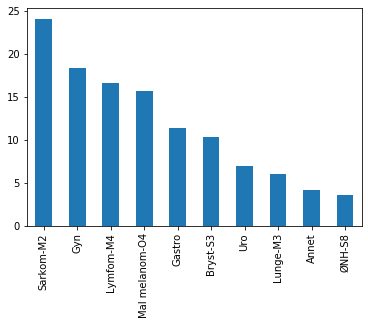

In [11]:
df=df.replace('Gyn-O2','Gyn')
df=df.replace('Gyn-O5','Gyn')
df=df.replace('Gyn-O7','Gyn')
df=df.replace('Gyn-M1','Gyn')
df=df.replace('Uro-O1','Uro')
df=df.replace('Uro-S7','Uro')
df=df.replace('Uro-S9','Uro')
df=df.replace('Gastro-O3','Gastro')
df=df.replace('Gastro-O8','Gastro')
df=df.replace('Gastro-S1','Gastro')
df=df.replace('Origo incerta-S6','Annet')
df=df.replace('Hudtumores-S5','Annet')
df=df.replace('Ukjent','Annet')
df=df.replace('CNS-S4','Annet')
df=df.replace('Testis-M5','Annet')
df=df.replace('SCRMAM','Annet')
df=df.replace('Thyroidea-O6','Annet')
series=(df['PERFORMINGUNIT'].value_counts())/104
print(series)
(df['PERFORMINGUNIT'].value_counts()/104).plot(kind='bar')

In [12]:
def rounder(num):  
    if (float(num) % 1) >= 0.5:
        x = np.ceil(num)
    else:
        x = np.floor(num)
    return x

count=0
sumS=0
for i in series:
    number=rounder(i)
    series[count]=number
    count+=1
    sumS+=number
print(series)
print("Sum:", sumS)

Sarkom-M2         24.0
Gyn               18.0
Lymfom-M4         17.0
Mal melanom-O4    16.0
Gastro            11.0
Bryst-S3          10.0
Uro                7.0
Lunge-M3           6.0
Annet              4.0
ØNH-S8             4.0
Name: PERFORMINGUNIT, dtype: float64
Sum: 117.0


In [13]:
df_ekstern = pd.read_excel('CT_tall_ekstern.xlsx')

In [14]:
df_ekstern=df_ekstern[df_ekstern['modalitet_norako'] == 'CT']
df_ekstern=df_ekstern[df_ekstern['aar'] != 2019]

df_ekstern=df_ekstern.replace('Gyn-O2','Gyn')
df_ekstern=df_ekstern.replace('Gyn-O5','Gyn')
df_ekstern=df_ekstern.replace('Gyn-O7','Gyn')
df_ekstern=df_ekstern.replace('Gyn-M1','Gyn')
df_ekstern=df_ekstern.replace('Uro-O1','Uro')
df_ekstern=df_ekstern.replace('Uro-S7','Uro')
df_ekstern=df_ekstern.replace('Uro-S9','Uro')
df_ekstern=df_ekstern.replace('Gastro-O3','Gastro')
df_ekstern=df_ekstern.replace('Gastro-O8','Gastro')
df_ekstern=df_ekstern.replace('Gastro-S1','Gastro')
df_ekstern=df_ekstern.replace('Origo incerta-S6','Annet')
df_ekstern=df_ekstern.replace('Hudtumores-S5','Annet')
df_ekstern=df_ekstern.replace('Ukjent','Annet')
df_ekstern=df_ekstern.replace('CNS-S4','Annet')
df_ekstern=df_ekstern.replace('Testis-M5','Annet')
df_ekstern=df_ekstern.replace('Endokr. Aker','Annet')
df_ekstern=df_ekstern.replace('Thyroidea-O6','Annet')

Gyn               28.0
Sarkom-M2         23.0
Gastro            19.0
Lymfom-M4         15.0
Lunge-M3           9.0
Uro                7.0
Bryst-S3           5.0
Mal melanom-O4     3.0
Annet              2.0
ØNH-S8             1.0
Name: PERFORMINGUNIT, dtype: float64
Sum: 112.0


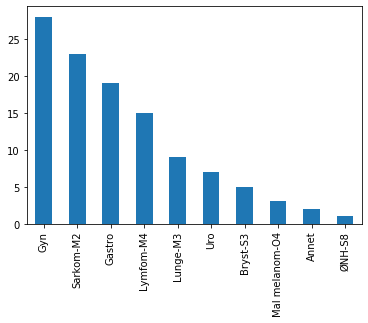

In [15]:
series2=(df_ekstern['PERFORMINGUNIT'].value_counts())/(104)

count=0
sumS=0
for i in series2:
    number=rounder(i)
    series2[count]=number
    count+=1
    sumS+=number
print(series2)
print("Sum:", sumS)
series2.plot(kind='bar')

aar   mnd
2017  1      465
      2      483
      3      620
      4      346
      5      505
      6      598
      7      448
      8      441
      9      584
      10     491
      11     535
      12     502
2018  1      578
      2      529
      3      520
      4      535
      5      437
      6      601
      7      431
      8      428
      9      372
      10     488
      11     526
      12     399
dtype: int64


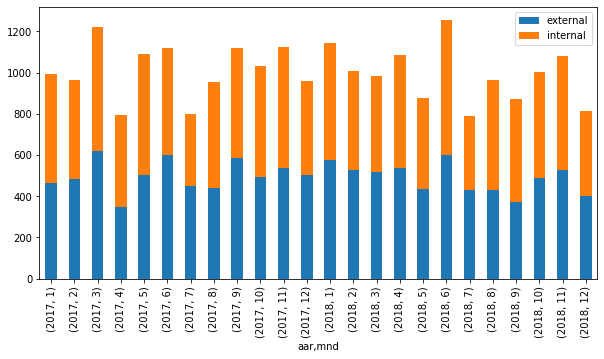

In [16]:
print(df_ekstern.groupby(["aar", "mnd"]).size())
s1=df_ekstern.groupby(["aar", "mnd"]).size()#.plot(kind="bar",color='red',figsize=(10,5))
s2=df.groupby(["aar", "mnd"]).size()#.plot(kind="bar",color='blue', figsize=(10,5))
pd.concat(dict(external = s1, internal = s2),axis = 1).plot(kind="bar", stacked=True, figsize=(10,5))
